# 5.2.1: Generating Example Classification Data

- Learn how to generate and plot classification data in Python

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
h = 1
sd = 1
n = 50

def gen_data(n, h, sd1, sd2):
  x1 = ss.norm.rvs(-h, sd1, n)
  y1 = ss.norm.rvs(0, sd1, n)

  x2 = ss.norm.rvs(h, sd2, n)
  y2 = ss.norm.rvs(h, sd2, n)

  return (x1,y1, x2, y2)

In [3]:
(x1, y1, x2, y2) = gen_data(50, 1, 1, 1.5)

In [4]:
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)

In [5]:
def plot_data(x1, y1, x2, y2):
  plt.figure()
  plt.plot(x1, y1, "o", ms=2)
  plt.plot(x2, y2, "o", ms=2)
  plt.xlabel("$X_1$")
  plt.ylabel("$X_2$")

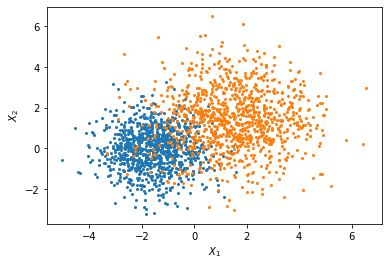

In [6]:
plot_data(x1,y1,x2,y2)

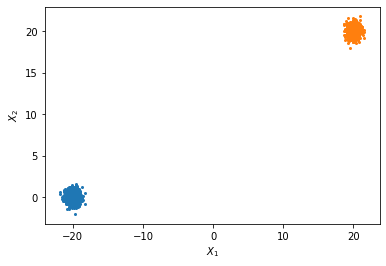

In [8]:
plot_data(*gen_data(1000, 20, .5, .5))

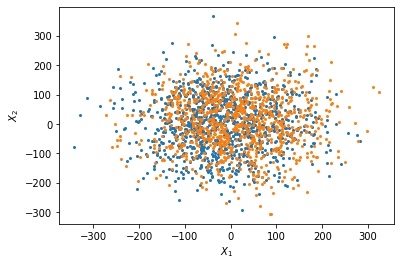

In [9]:
plot_data(*gen_data(1000, 10, 100, 100))

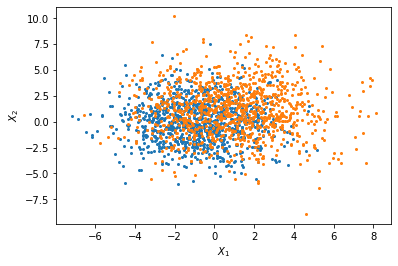

In [10]:
plot_data(*gen_data(1000, 1, 2, 2.5))

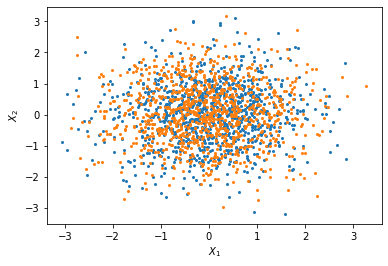

In [11]:
plot_data(*gen_data(1000, 0, 1, 1))

# 5.2.2: Logistic Regression
- Learn the basics of logistic regression

Logistic regression
- dispite it's name it's a binary classifier and does not perform regression

**Q: What is one of the problems with using linear regression to predict probabilities?**

- A: Linear regression may predict values outside of the interval between 0 and 1.


The following code creates a function that converts probability to odds:

In [15]:
def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

Assume that there are only two classes and all data points belong to one of these two classes. The probability that a given data point belongs to Class 1 is 0.2.

What are the odds that a given data point belongs to Class 2 as given by the function above?

In [17]:
prob_to_odds(0.8)

4.000000000000001

# 5.2.3: Logistic Regression in Code
- Learn how to use the scikit-learn library to perform logistic regression


In [18]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
np.vstack((x1,y1))

array([[-1.41641086, -2.32165464, -2.80882187, ..., -0.90701291,
        -0.95922635, -0.62658233],
       [-0.35619239, -0.43622712, -0.39235536, ..., -1.94436831,
         0.05834656,  1.12862334]])

In [21]:
np.vstack((x1,y1)).shape

(2, 1000)

In [23]:
np.vstack((x1,y1)).T.shape

(1000, 2)

In [24]:
np.vstack((x2, y2)).shape

(2, 1000)

In [25]:
np.vstack((x2, y2)).T.shape

(1000, 2)

In [33]:
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
X.shape

(2000, 2)

In [34]:
n = 1000

y = np.hstack((np.repeat(1,n), np.repeat(2,n)))
y.shape

(2000,)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.5, 
                                                    random_state = 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1000, 2) (1000, 2) (1000,) (1000,)


In [37]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
clf.score(X_test, y_test)

0.906

In [39]:
clf.predict_proba(np.array([-2, 0]))

ValueError: ignored

In [40]:
# Reading the Error message above, we need to reshape our data
clf.predict_proba(np.array([-2, 0]).reshape(1, -1))

array([[0.97829924, 0.02170076]])

In [41]:
clf.predict(np.array([-2,0]).reshape(1,-1))

array([1])

We performed a series of steps using common (and important) methods on the classifier object clf().

**Q: If you have data and want to train a model, which method would you use? **
- A: `clf.fit()`

**Q: If you want to compute the accuracy of your model, which method would you use?**
- A: `clf.score()`

**Q: If you want to estimate the probability of a data point being in each class, which method would you use?**
- A: `clf.predict_proba()`

**Q: If you want to know to which class your model would assign a new data point, which method would you use?**
- A: `clf.predict()`

# 5.2.4: Computing Predictive Probabilities Across the Grid
- Learn how to use meshgrid and ravel to compute predictive probabilities
- Learn how to plot the predictive probabilities

In [42]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

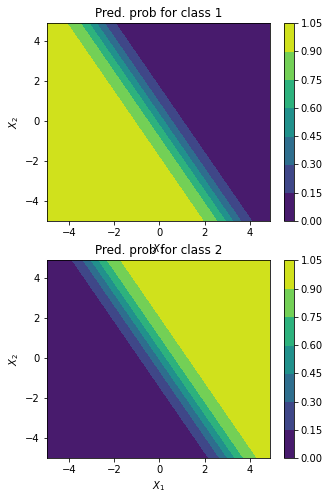

In [43]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");

**Q: What does the pattern of probabilities across the grid indicate about  X1  and  X2 ?**
- A:

The sum of the class probabilities:
 - will always equal 1 for any number of classes.